In [1]:
import argparse
import subprocess, os
from process_data import *
import random
import numpy as np
import torch
from data.dataset import create_datasets
from Generator.Generator import generator
import yaml
import matplotlib.pyplot as plt
from ast import literal_eval

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
stream=open("Configs/SST-2/WSVAE.yaml", "r")
argsdict=yaml.safe_load(stream)
if argsdict['computer'] == 'home':
    argsdict['path'] = "/media/frederic/VAETI"
elif argsdict['computer'] == 'labo':
    argsdict['path'] = "/u/piedboef/Documents/VAETI"

if argsdict['dataset'] == "SST2":
    categories = ["neg", "pos"]
elif argsdict['dataset'] == "TREC6":
    categories = ["ABBR", "DESC", "ENTY", "HUM", "LOC", "NUM"]
elif argsdict['dataset'] == "FakeNews":
    categories = ["Fake", "Real"]
elif argsdict['dataset'] == "QNLI":
    categories = ["entailment", "not_entailment"]
elif argsdict['dataset'] == "Irony":
    categories = ["NotIro", "Iro"]
elif argsdict['dataset'] == "IronyB":
    categories = ["Clash", "Situational", "Other", "NotIro"]
elif argsdict['dataset'] == 'MNIST':
    categories = [0,1,2,3,4,5,6,7,8,9]
else:
    raise ValueError("Dataset not found")
argsdict['categories'] = categories

argdict=argsdict
    

In [2]:
train, dev, test=create_datasets(argdict)
Gen = generator(argdict, train, dev, test)
Gen.train()

VAE_model(
  (encoder): encoder(
    (model): Linear_Encoder(
      (fc1): Linear(in_features=784, out_features=512, bias=True)
      (fc2): Linear(in_features=512, out_features=256, bias=True)
      (hidden2mean): Linear(in_features=256, out_features=5, bias=True)
      (hidden2logv): Linear(in_features=256, out_features=5, bias=True)
    )
  )
  (decoder): decoder(
    (model): Linear_Decoder(
      (latent2hidden): Linear(in_features=5, out_features=256, bias=True)
      (fc5): Linear(in_features=256, out_features=512, bias=True)
      (fc6): Linear(in_features=512, out_features=784, bias=True)
    )
  )
)


/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


TRAIN Epoch 0/30, Mean ELBO 157.19635951019995, Mean LF 149.00399780273438, Mean KL div 8.192373275756836
DEV Epoch 0/30, Mean ELBO 133.91722531861896, Mean LF 123.71284484863281, Mean KL div 10.204368591308594
TRAIN Epoch 1/30, Mean ELBO 129.64051583755847, Mean LF 118.75518035888672, Mean KL div 10.885333061218262
DEV Epoch 1/30, Mean ELBO 127.76534251925311, Mean LF 116.81993865966797, Mean KL div 10.945417404174805
TRAIN Epoch 2/30, Mean ELBO 125.3374968595283, Mean LF 114.14154815673828, Mean KL div 11.195940017700195
DEV Epoch 2/30, Mean ELBO 124.85217864603936, Mean LF 113.4797134399414, Mean KL div 11.37248420715332


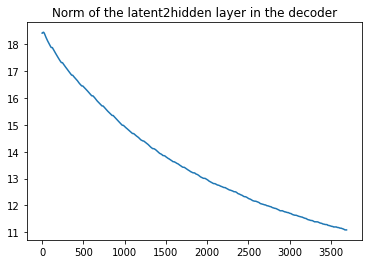

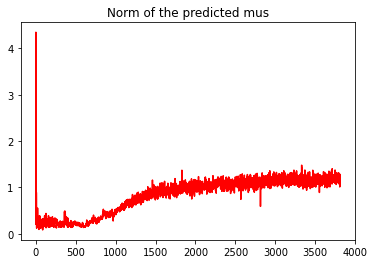

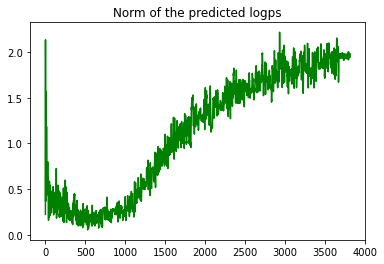

In [22]:
y=Gen.generator.model.decoder.norm
x=np.arange(len(y))

plt.plot(x,y)
plt.title("Norm of the latent2hidden layer in the decoder")
plt.show()

y=Gen.generator.model.encoder.means
x=np.arange(len(y))

plt.plot(x,y, 'r')
plt.title("Norm of the predicted mus")
plt.show()

y=Gen.generator.model.encoder.logps
x=np.arange(len(y))

plt.plot(x,y, 'g')
plt.title("Norm of the predicted logps")
plt.show()

2.2048757937783843


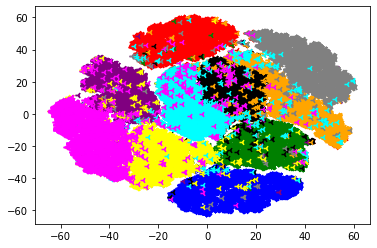

In [9]:
df=pd.read_csv('graph_MNIST.tsv', sep='\t', index_col=0)
ll=list(df['points'])
ll=np.array([literal_eval(l) for l in ll])
# print(ll)
ll=[np.linalg.norm(l) for l in ll]
print(np.mean(ll))

colors=['red', 'blue', 'green',
		'black', 'purple', 'orange',
		'grey', 'yellow', 'cyan',
		'magenta']
for i in range(10):
	dfTemp=df[df['labs']==i]
	x=dfTemp['x']
	y=dfTemp['y']
	plt.scatter(x=x, y=y, c=colors[i] , marker='3', label=i)

plt.legend()
plt.title("Distribution of the MNIST dataset in a latent space learned by a VAE")
plt.show()
